# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics as metrics
import pickle


Bad key "text.kerning_factor" on line 4 in
C:\Users\Shyam prasath\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
pd.set_option('mode.chained_assignment', None)

# Import the dataset

In [3]:
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'Float64':
        pass
    else:
        print('The name of the column is : {}'.format(i))
        print(df[i].value_counts())
        print('')

The name of the column is : Car_Name
city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
Hero Honda Passion Pro     1
vitara brezza              1
Mahindra Mojo XT300        1
baleno                     1
Bajaj Dominar 400          1
Name: Car_Name, Length: 98, dtype: int64

The name of the column is : Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

The name of the column is : Seller_Type
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

The name of the column is : Transmission
Manual       261
Automatic     40
Name: Transmission, dtype: int64



C:\Users\Shyam prasath\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


In [7]:
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

# Check Missing values

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Data Audit

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [10]:
df.drop(['Car_Name'], axis =1, inplace = True)  # Drop unique variable

In [11]:
df.tail()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# Extract New Feature from the data

In [12]:
df['no_year'] = date.today().year - df['Year']

In [13]:
df.drop(['Year'], axis =1, inplace = True) 

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


# One hot encoding

In [15]:
df = pd.get_dummies(df, drop_first = True)

In [16]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


# Visualization (EDA)

# Correlation Analysis

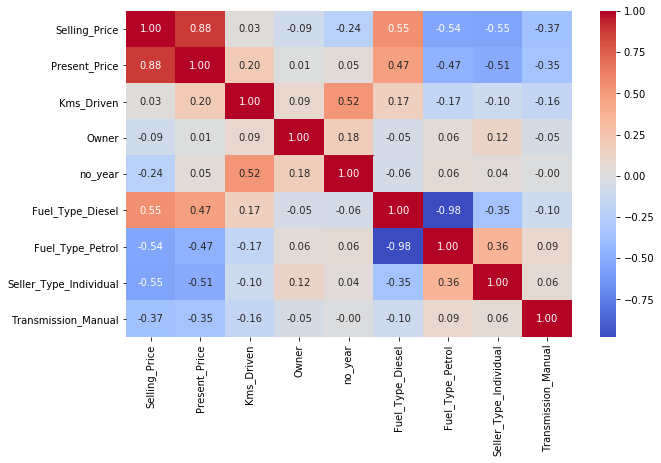

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

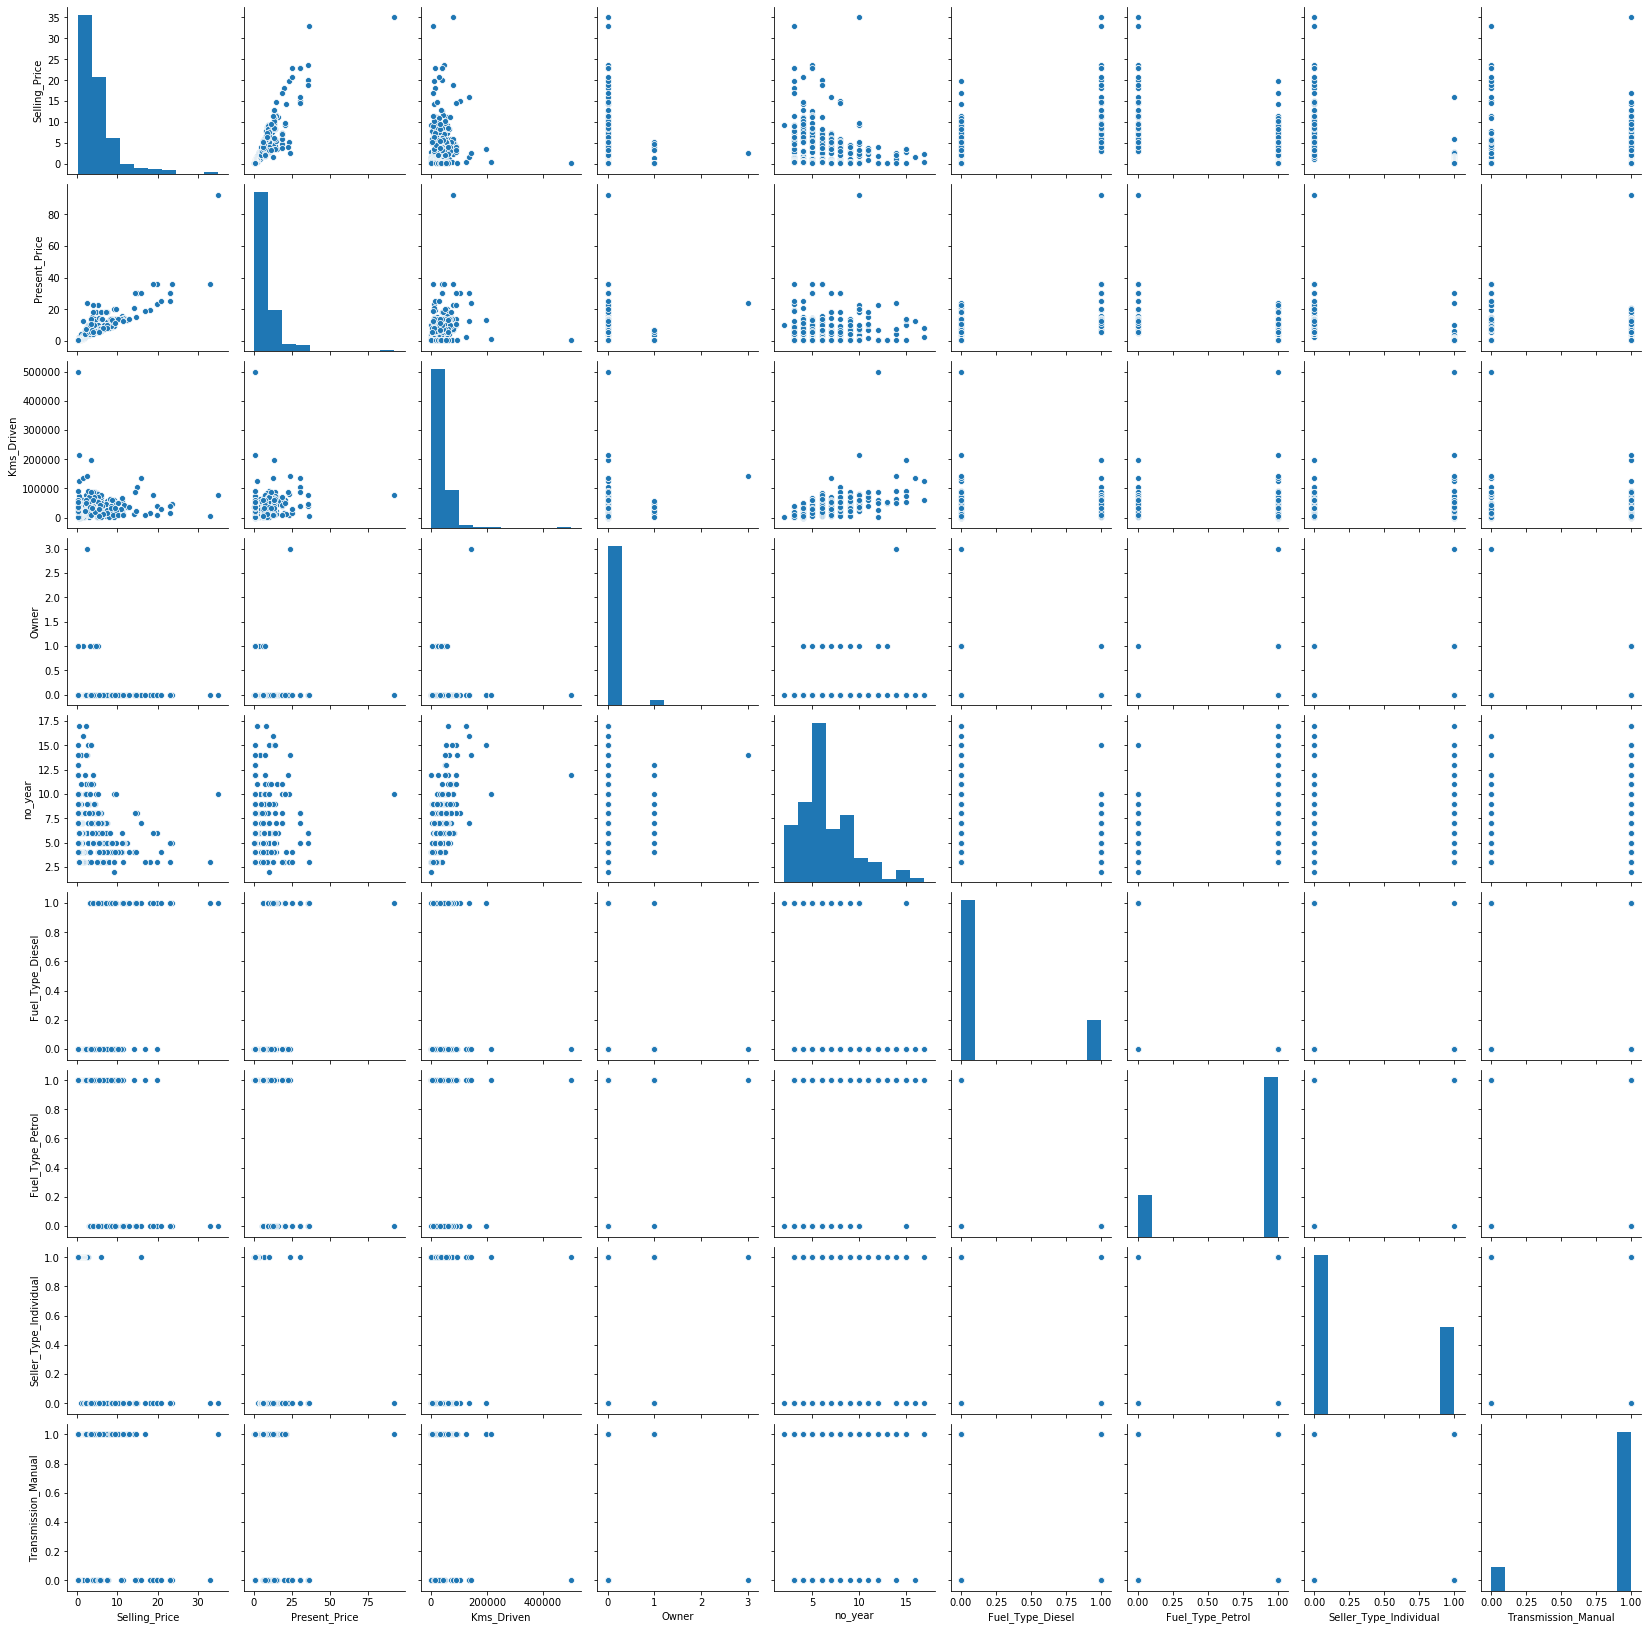

In [18]:
sns.pairplot(df)
plt.show()

# Split the data

In [19]:
x = df[df.columns.difference(['Selling_Price'])]
y = df['Selling_Price']

In [20]:
x.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Kms_Driven,Owner,Present_Price,Seller_Type_Individual,Transmission_Manual,no_year
0,0,1,27000,0,5.59,0,1,6
1,1,0,43000,0,9.54,0,1,7
2,0,1,6900,0,9.85,0,1,3
3,0,1,5200,0,4.15,0,1,9
4,1,0,42450,0,6.87,0,1,6


In [21]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Feature selection

In [22]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [23]:
model.feature_importances_

array([0.22622114, 0.01096209, 0.04154453, 0.00051162, 0.38510774,
       0.12516974, 0.13216257, 0.07832056])

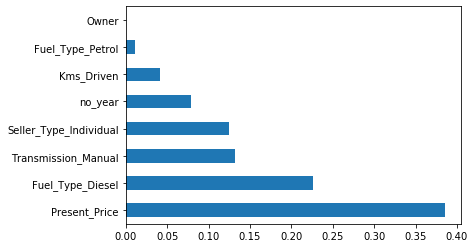

In [24]:
pd.Series(model.feature_importances_, index = x.columns).sort_values(ascending = False).plot(kind = 'barh')
plt.show()

> We found that present_price variable is contributing more in the model other than any other model.

# Split train and test data

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [26]:
print(x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(301, 8) (210, 8) (91, 8) (210,) (91,)


# Model Building

In [27]:
# Randomized serach cv

n_estimator = [int(x) for x in np.linspace(100,1200., 12)]
max_features = ['Auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_sample_split = [2, 5,10,15,100]
min_sample_leaf = [1,2,5,10]

In [28]:
params = {'n_estimators': n_estimator,
          'max_features': max_features,
          'max_depth' : max_depth,
          'min_samples_split': min_sample_split,
          'min_samples_leaf': min_sample_leaf}

In [29]:
rf = RandomForestRegressor()


In [30]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions =  params, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 10, verbose = 2, random_state = 43, n_jobs = -1)

In [31]:
rf_random.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.9s finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['Auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=43, scoring='neg_mean_squared_error',
                   verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [33]:
rf_random.best_score_

-4.449357470274149

# Predict

In [34]:
y_pred_train = rf_random.predict(x_train)
y_pred_test = rf_random.predict(x_test)

# Model accuracy

In [35]:
print('MAE for train data: ', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE for train data: ', metrics.mean_squared_error(y_train, y_pred_train))
print('RMAE for train data: ', np.sqrt(metrics.mean_absolute_error(y_train, y_pred_train)))

MAE for train data:  0.311200919377251
MSE for train data:  0.5641477838280035
RMAE for train data:  0.55785385127043


In [36]:
print('MAE for test data: ', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE for test data: ', metrics.mean_squared_error(y_test, y_pred_test))
print('RMAE for test data: ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred_test)))

MAE for test data:  0.8197687097866009
MSE for test data:  2.9623228648263167
RMAE for test data:  0.9054107961508968


In [37]:
print('The train accuracy is : {}'.format(metrics.r2_score(y_pred_train, y_train)))

The train accuracy is : 0.972043797397673


In [38]:
print('The test accuracy is : {}'.format(metrics.r2_score(y_pred_test, y_test)))

The test accuracy is : 0.8671547733726048


# Check the residuals(errors)

# For Train Dataset

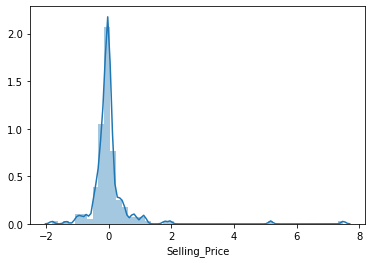

In [39]:
sns.distplot(y_train - y_pred_train)
plt.show()

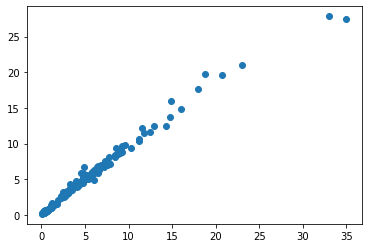

In [40]:
plt.scatter(y_train,y_pred_train)
plt.show()

# For Test Dataset

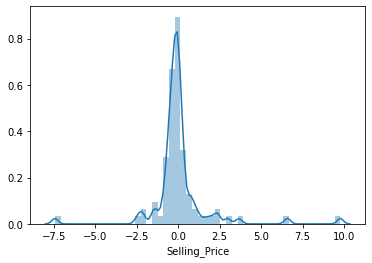

In [41]:
sns.distplot(y_test - y_pred_test)
plt.show()

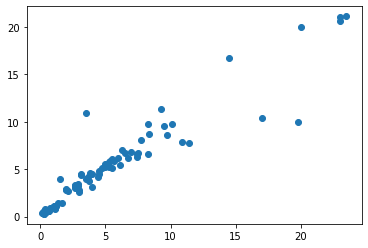

In [42]:
plt.scatter(y_test,y_pred_test)
plt.show()

> The residuals are normally distributed, so the model is predicting good.

# Pickle the model

In [43]:
file = open('Random_forest_model.pkl', 'wb')

pickle.dump(rf_random, file)

In [44]:
# Load Model
model_dup = pickle.load(open('Random_forest_model.pkl', 'rb'))